## Camera Calibration

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Computing the camera calibration using chessboard images

- When observed manually, it was found that calibration images of chessboard had varying row and column edges for calibration.
- Hence, a for loop is used to process the following combinations (5, 6) , (5, 7), (5, 9), (6, 9) where the first digit signifies row wise edge and the second digit column wise edge

Number of corners: 5 x 6
Processing file: camera_cal/calibration15.jpg
Processing file: camera_cal/calibration4.jpg
Number of corners: 5 x 7
Processing file: camera_cal/calibration5.jpg
Number of corners: 5 x 9
Processing file: camera_cal/calibration1.jpg
Number of corners: 6 x 9
Processing file: camera_cal/calibration10.jpg
Processing file: camera_cal/calibration11.jpg
Processing file: camera_cal/calibration12.jpg
Processing file: camera_cal/calibration13.jpg
Processing file: camera_cal/calibration14.jpg
Processing file: camera_cal/calibration15.jpg
Processing file: camera_cal/calibration16.jpg
Processing file: camera_cal/calibration17.jpg
Processing file: camera_cal/calibration18.jpg
Processing file: camera_cal/calibration19.jpg
Processing file: camera_cal/calibration2.jpg
Processing file: camera_cal/calibration20.jpg
Processing file: camera_cal/calibration3.jpg
Processing file: camera_cal/calibration6.jpg
Processing file: camera_cal/calibration7.jpg
Processing file: camera_cal/calib

/Users/adityaborde/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Processing file: camera_cal/calibration9.jpg


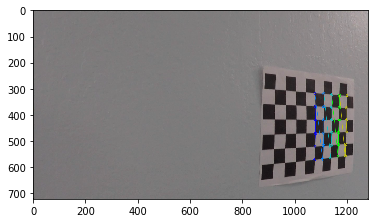

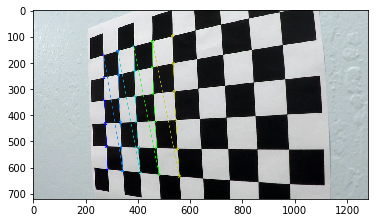

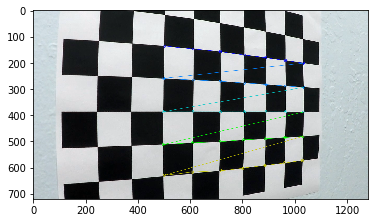

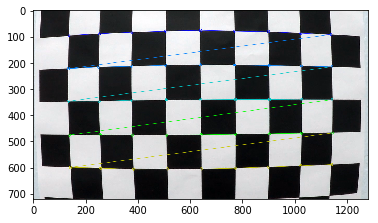

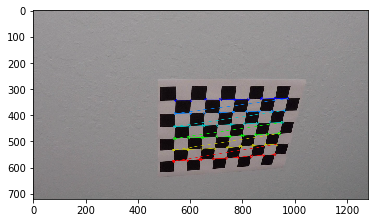

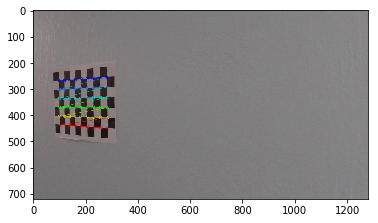

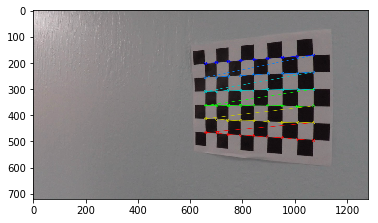

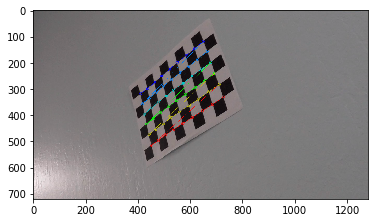

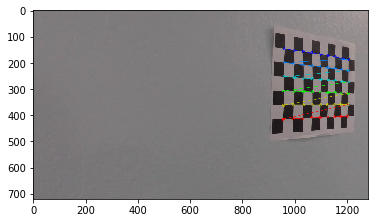

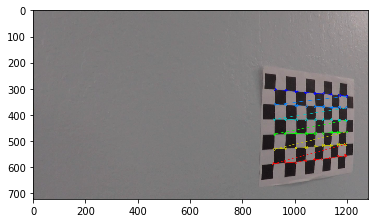

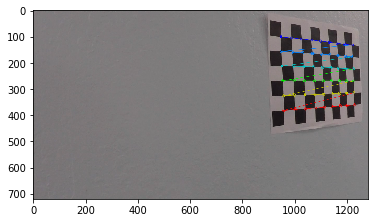

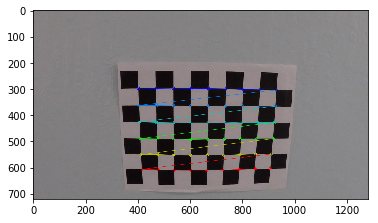

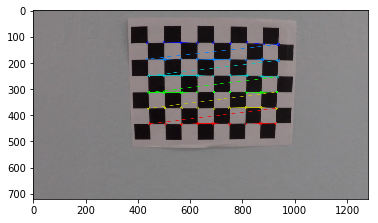

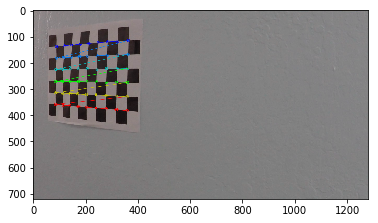

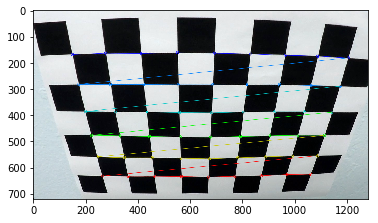

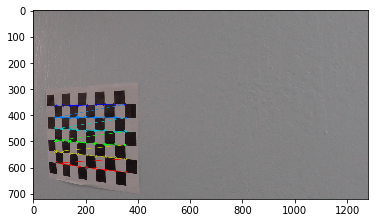

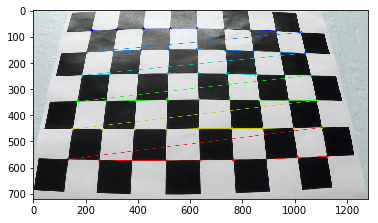

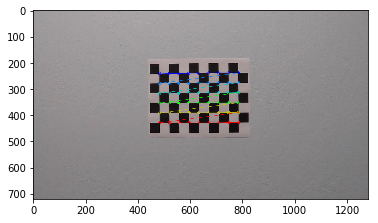

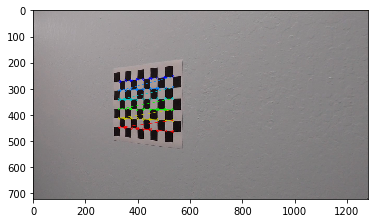

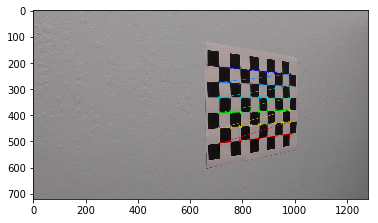

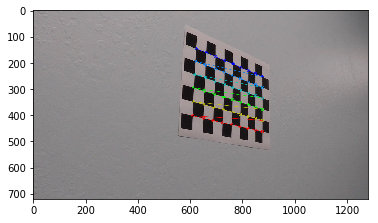

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Trying various combinations of number of row corners and number of column corners
for edges in [(5,6), (5, 7), (5, 9), (6, 9)]:
        
        x, y = edges
        
        print('Number of corners:', x, 'x', y)
        
        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((x*y,3), np.float32)
        objp[:,:2] = np.mgrid[0:y,0:x].T.reshape(-1,2)

        # Arrays to store object points and image points from all the images.
        objpoints = [] # 3d points in real world space
        imgpoints = [] # 2d points in image plane.

        # Make a list of calibration images
        images = glob.glob('camera_cal/calibration*.jpg')

        # Step through the list and search for chessboard corners
        for fname in images:
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (y,x),None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)

                # Draw and display the corners
                img = cv2.drawChessboardCorners(img, (y,x), corners, ret)
                fig = plt.figure()
                plt.imshow(img)
                print('Processing file:', fname)
                
                # Saving file for review
                output_fname = 'output_images/Calibration-Output/Chessboard-Edges/edges_'+fname.split('/')[1]
                cv2.imwrite(output_fname, img)


## Calculating distortion coefficients and camera calibration matrix, undistorting images

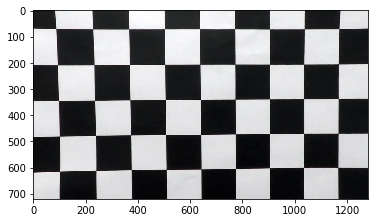

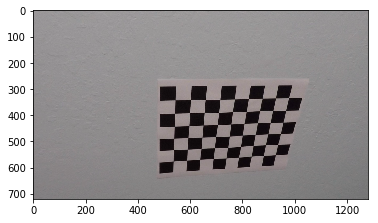

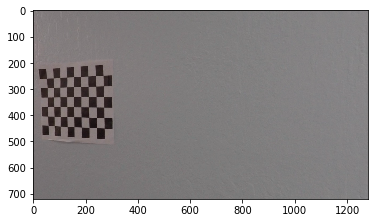

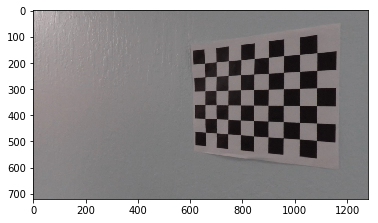

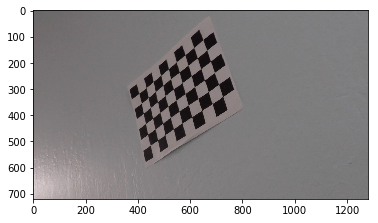

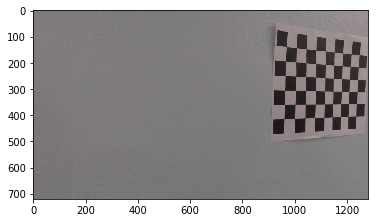

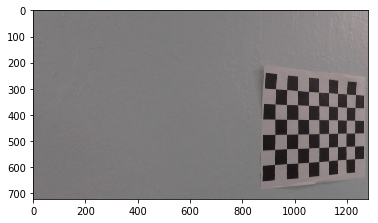

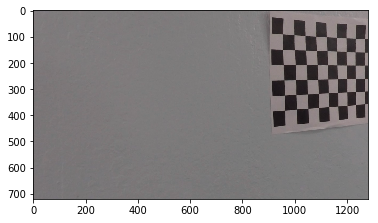

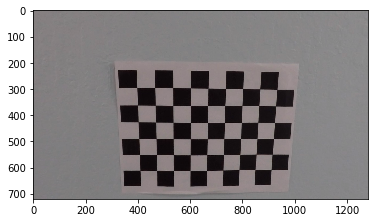

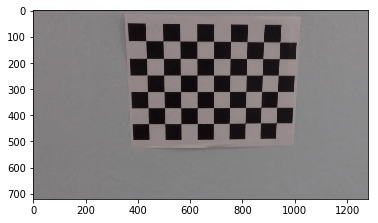

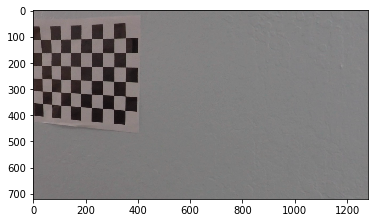

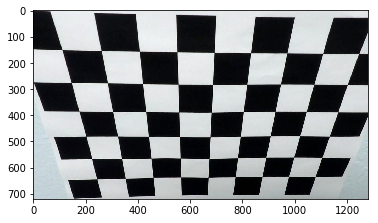

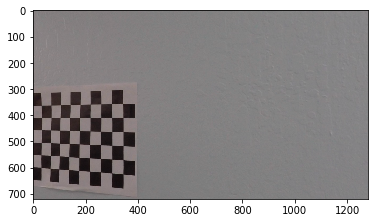

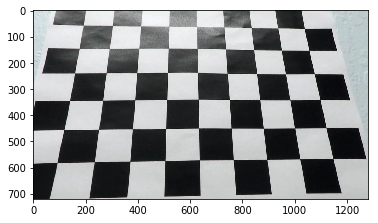

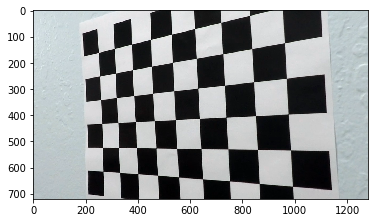

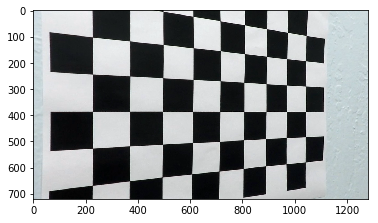

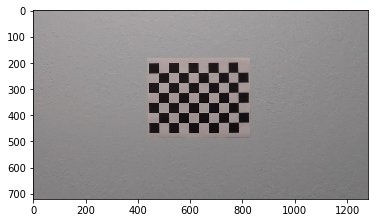

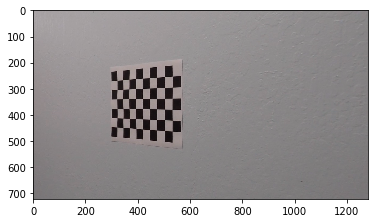

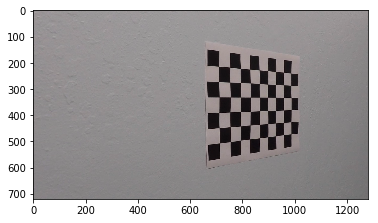

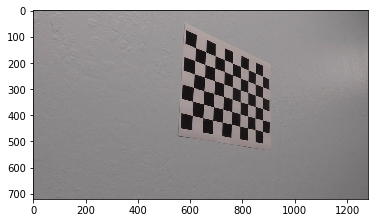

In [2]:
# Calibrating camera to obatin distortion co-efficient 'dist' and calibration matrix 'mtx'
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

for fname in images:
    
    # Reading Image
    img = cv2.imread(fname)
    
    # Undistorting Image with 'dist' and 'mtx'
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    # Plotting Undistorted Image
    fig = plt.figure()
    plt.imshow(undist)
    
    # Saving Undistorted Image
    output_fname = 'output_images/Calibration-Output/Undistorted-Chessboard/undistorted_'+fname.split('/')[1]
    cv2.imwrite(output_fname, undist)

## Saving Calibration Matrix and Distortion Coefficient

In [3]:
import pickle

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration.p", "wb" ) )

print('Camera Calibration Saved')

Camera Calibration Saved


## Now we will use these calibrations for processing the test images and video

The steps are provided in [Finding Lanes.ipynb](Finding Lanes.ipynb) file